In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sampling interval (s)
DELTA_T = 30 

# number of linear model
N = 20

# time simulation (s)
T_SIMULATION = 100*60


# Parameter
RESPONSE_PARAM = {
    'DB-CO': {'Ku': 15.8,  'T': 164.3, 'L': 30, 'P1': 105.3, 'P2': 0.028}, 
    'DB-AP': {'Ku': 4.4,   'T': 65.2,  'L': 30, 'P1': 22.8,  'P2': 0.145},  
    'SN-CO': {'Ku': 3.0,   'T': 40.6,  'L': 60, 'P1': 37.7,  'P2': 0.051}, 
    'SN-AP': {'Ku': -12.5, 'T': 209.4, 'L': 60, 'P1': -26.2, 'P2': -0.085}
}

# Create Range T
RANGE_T = list(range(DELTA_T, T_SIMULATION+1, DELTA_T))
RANGE_T.insert(0, 0) # [0, 30, 60, ...]

# MODELING
def math_model(u, drug_response):

    Ku = RESPONSE_PARAM[drug_response]['Ku']
    T = RESPONSE_PARAM[drug_response]['T']
    L = RESPONSE_PARAM[drug_response]['L']
    P1 = RESPONSE_PARAM[drug_response]['P1']
    P2 = RESPONSE_PARAM[drug_response]['P2']


    unit_impulse = [ (Ku/T)*np.exp(-(t-L)/T)*DELTA_T if t>0 else 0 for t in RANGE_T ]

    out_linear = []
    out_nonlinear = []

    for t_index in range(0, len(u)):

        # Linear Model (Unit Impulse Reponse)
        temp = 0
        for to in range(0, N+1):    
            if t_index <= to:
                u_delay = 0
            else:
                u_delay = u[t_index-to]
            temp += unit_impulse[to] * u_delay
        out_linear.append(temp)

        # Nonlinear Model (sigmoid)
        out_nonlinear.append(P1 * math.tanh((P2*temp)/2))

    return out_linear, out_nonlinear


###########
INPUT_DB = []
for t in RANGE_T:
    INPUT_DB.append(random.uniform(0, 10))

INPUT_SN = []
for t in RANGE_T:
    INPUT_SN.append(random.uniform(0, 10))

###########


CO1_linear, CO1_nonlinear = math_model(u=INPUT_DB, drug_response='DB-CO')
CO2_linear, CO2_nonlinear = math_model(u=INPUT_SN, drug_response='SN-CO')

AP1_linear, AP1_nonlinear = math_model(u=INPUT_SN, drug_response='SN-AP')
AP2_linear, AP2_nonlinear = math_model(u=INPUT_DB, drug_response='DB-AP')

k1, k2, l1, l2 = 1, 1, 1, 1
CO = [None]*len(RANGE_T)
AP = [None]*len(RANGE_T)
for t in range(0, len(RANGE_T)):
    CO[t] = k1*CO1_nonlinear[t] + k2*CO2_nonlinear[t]
    AP[t] = l1*AP1_nonlinear[t] + l2*AP2_nonlinear[t]




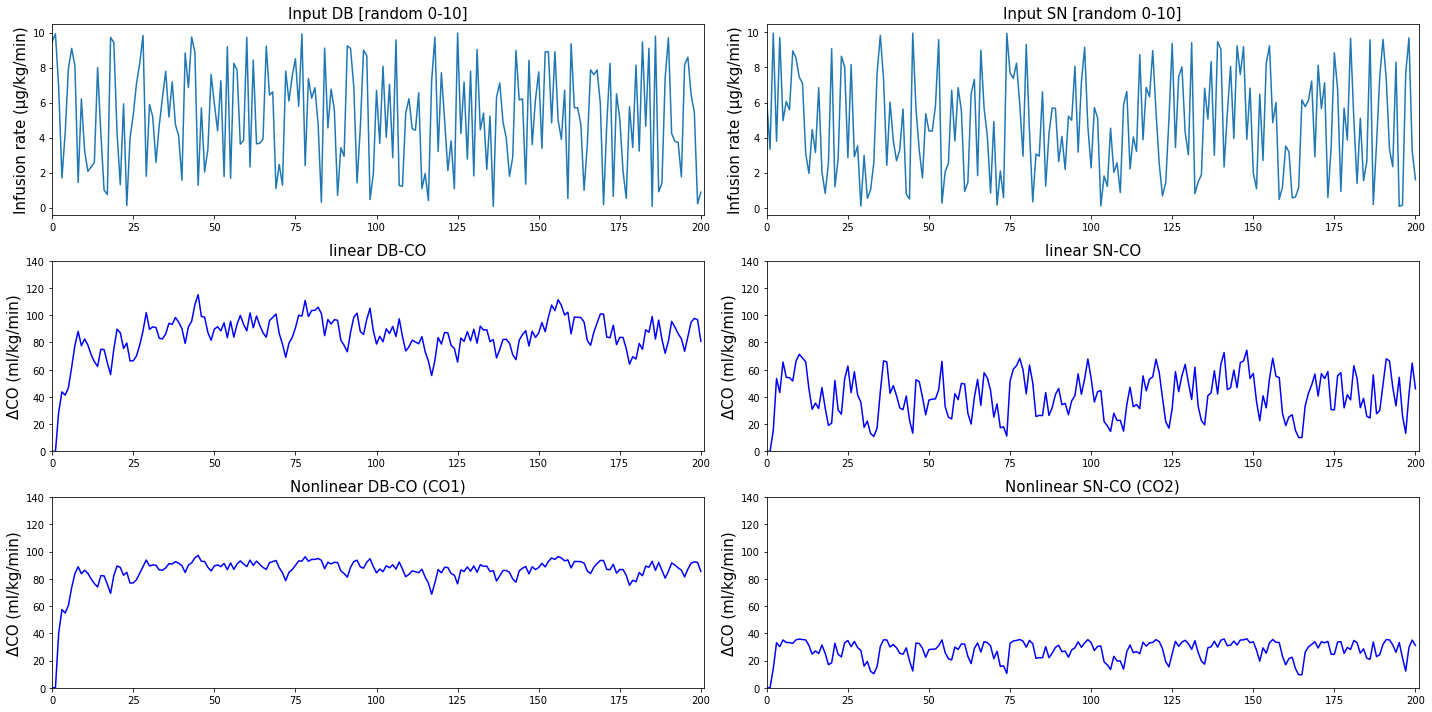

In [3]:
plt.figure(figsize=(20,10))

## DB - CO
plt.subplot(321)
plt.plot(INPUT_DB)
plt.xlim((0, len(RANGE_T)))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input DB [random 0-10]', fontsize=15)

plt.subplot(323)
plt.plot(CO1_linear, 'b')
plt.xlim((0, len(RANGE_T)))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('linear DB-CO', fontsize=15)

plt.subplot(325)
plt.plot(CO1_nonlinear, 'b')
plt.xlim((0, len(RANGE_T)))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('Nonlinear DB-CO (CO1)', fontsize=15)

#  SN - CO
plt.subplot(322)
plt.plot(INPUT_SN)
plt.xlim((0, len(RANGE_T)))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input SN [random 0-10]', fontsize=15)

plt.subplot(324)
plt.plot(CO2_linear, 'b')
plt.xlim((0, len(RANGE_T)))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('linear SN-CO', fontsize=15)

plt.subplot(326)
plt.plot(CO2_nonlinear, 'b')
plt.xlim((0, len(RANGE_T)))
plt.ylim((0, 140))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('Nonlinear SN-CO (CO2)', fontsize=15)

plt.tight_layout()



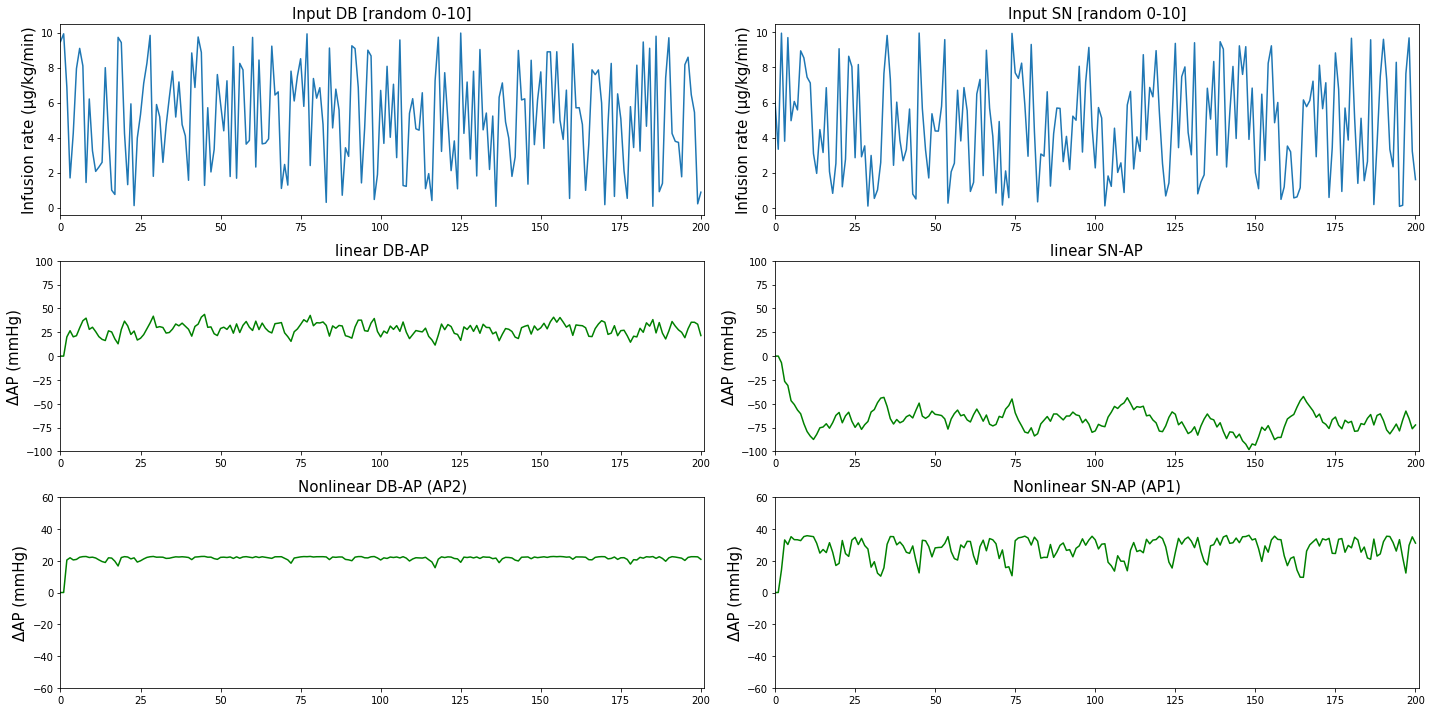

In [4]:
plt.figure(figsize=(20,10))

## DB - AP
plt.subplot(321)
plt.plot(INPUT_DB)
plt.xlim((0, len(RANGE_T)))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input DB [random 0-10]', fontsize=15)

plt.subplot(323)
plt.plot(AP2_linear, 'g')
plt.xlim((0, len(RANGE_T)))
plt.ylim((-100, 100))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('linear DB-AP', fontsize=15)

plt.subplot(325)
plt.plot(AP2_nonlinear, 'g')
plt.xlim((0, len(RANGE_T)))
plt.ylim((-60, 60))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('Nonlinear DB-AP (AP2)', fontsize=15)

#  SN - AP
plt.subplot(322)
plt.plot(INPUT_SN)
plt.xlim((0, len(RANGE_T)))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input SN [random 0-10]', fontsize=15)

plt.subplot(324)
plt.plot(AP1_linear, 'g')
plt.xlim((0, len(RANGE_T)))
plt.ylim((-100, 100))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('linear SN-AP', fontsize=15)

plt.subplot(326)
plt.plot(CO2_nonlinear, 'g')
plt.xlim((0, len(RANGE_T)))
plt.ylim((-60, 60))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('Nonlinear SN-AP (AP1)', fontsize=15)

plt.tight_layout()

201


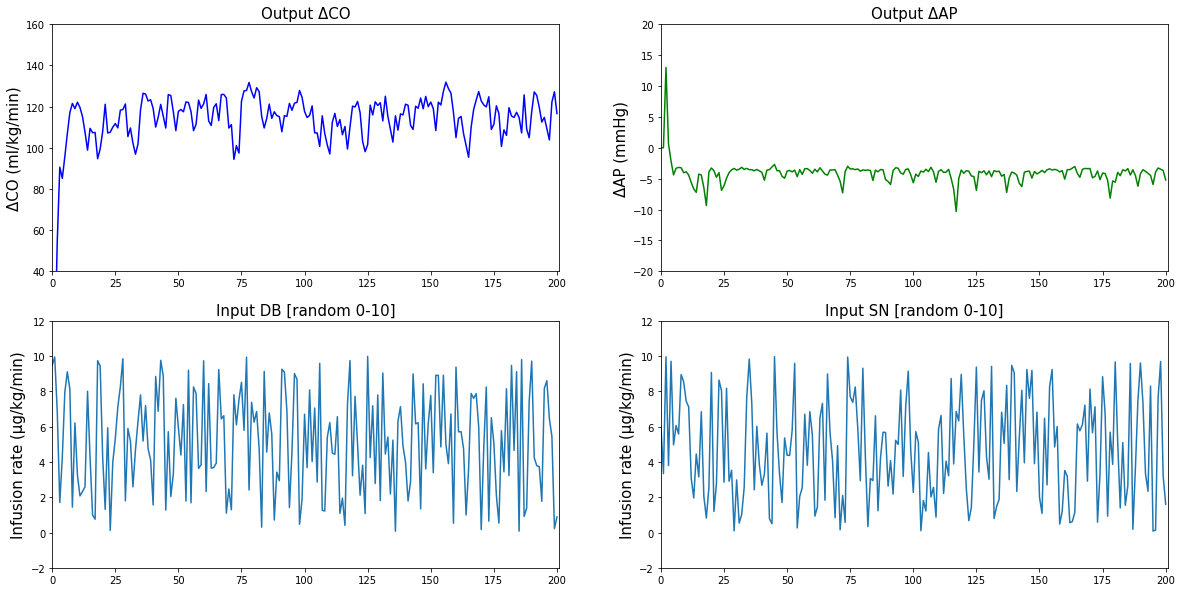

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.plot(CO, 'b')
plt.xlim((0, len(RANGE_T)))
plt.ylim((40, 160))
plt.ylabel('ΔCO (ml/kg/min)', fontsize=15)
plt.title('Output ΔCO', fontsize=15)

plt.subplot(222)
plt.plot(AP, 'g')
plt.xlim((0, len(RANGE_T)))
plt.ylim((-20, 20))
plt.ylabel('ΔAP (mmHg)', fontsize=15)
plt.title('Output ΔAP', fontsize=15)

plt.subplot(223)
plt.plot(INPUT_DB)
plt.xlim((0, len(RANGE_T)))
plt.ylim((-2, 12))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input DB [random 0-10]', fontsize=15)

plt.subplot(224)
plt.plot(INPUT_SN)
plt.xlim((0, len(RANGE_T)))
plt.ylim((-2, 12))
plt.ylabel('Infusion rate (μg/kg/min)', fontsize=15)
plt.title('Input SN [random 0-10]', fontsize=15)

print(len(CO))

In [6]:
"""
Prepare Dataset
"""

from sklearn.model_selection import train_test_split

LEN_COLUMN = 6
INDEX_SPLIT = int(0.8*len(RANGE_T))

def prepare_data_model(input_DB, input_SN, output):

    ## SPLIT DATA_MODEL & DATA_TEST
    input_DB_train = input_DB[2:INDEX_SPLIT]
    input_SN_train = input_SN[2:INDEX_SPLIT]
    output_train = output[2:INDEX_SPLIT]

    input_DB_test = INPUT_DB[INDEX_SPLIT:]
    input_SN_test = INPUT_SN[INDEX_SPLIT:]
    output_test = output[INDEX_SPLIT:]


    ## NORMALIZE DATA_MODEL
    input_DB_train_norm = (input_DB_train - np.mean(input_DB_train)) / np.std(input_DB_train)
    input_SN_train_norm = (input_SN_train - np.mean(input_SN_train)) / np.std(input_SN_train)
    output_train_norm = (output_train - np.mean(output_train)) / np.std(output_train)
   
    ## GENERATE MATRIX INPUT FROM DATA_MODEL (3x6)
    x_list = []
    y_list = []
    for i in range(LEN_COLUMN, len(output_train_norm)):
        row1 = input_DB_train_norm[i-6 : i]
        row2 = input_SN_train_norm[i-6 : i]
        row3 = output_train_norm[i-6 : i]

        x_list.append(np.array([row1, row2, row3]))
        y_list.append(output_train_norm[i])

    x = np.array(x_list)
    y = np.array(y_list)
    print(x.shape)
    print(y.shape)

    x = x.reshape((-1, 3, 6, 1))
    y = y.reshape((-1, 1))
    print(x.shape)
    print(y.shape)

    ## SPLIT INPUT INTO TRAIN/VALIDATION
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=5)

    print('X_train shape: ', x_train.shape)
    print('y_train shape: ', y_train.shape)
    print('X_val shape: ', x_val.shape)
    print('y_val shape: ', y_val.shape)


    ## NORMALIZE DATA_TEST
    input_DB_test_norm = (input_DB_test - np.mean(input_DB_train)) / np.std(input_DB_train)
    input_SN_test_norm = (input_SN_test - np.mean(input_SN_train)) / np.std(input_SN_train)
    output_test_norm = (output_test - np.mean(output_train)) / np.std(output_train)

    x_list = []
    y_list = []
    for i in range(LEN_COLUMN, len(output_test_norm)):
        row1 = input_DB_test_norm[i-6 : i]
        row2 = input_SN_test_norm[i-6 : i]
        row3 = output_test_norm[i-6 : i]

        x_list.append(np.array([row1, row2, row3]))
        y_list.append(output_test_norm[i])

    x_test = np.array(x_list)
    y_test = np.array(y_list)
    x_test = x_test.reshape((-1, 3, 6, 1))
    y_test = y_test.reshape((-1, 1))

    print('x_test shape: ', x_test.shape)
    print('y_test shape: ', y_test.shape)

    return x_train, x_val, x_test, y_train, y_val, y_test, output_train, output_test


###
x_train, x_val, x_test, y_train, y_val, y_test, output_train, output_test = prepare_data_model(input_DB=INPUT_DB, 
                                                                                                input_SN=INPUT_SN, 
                                                                                                output=CO)





(152, 3, 6)
(152,)
(152, 3, 6, 1)
(152, 1)
X_train shape:  (121, 3, 6, 1)
y_train shape:  (121, 1)
X_val shape:  (31, 3, 6, 1)
y_val shape:  (31, 1)
x_test shape:  (35, 3, 6, 1)
y_test shape:  (35, 1)


In [7]:
# CNN
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

In [8]:
model = Sequential()
model.add(Conv2D(filters=12, kernel_size=3, padding="same", activation="relu", input_shape=(3,6,1)))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(filters=12, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Conv2D(filters=12, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 6, 12)          120       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 3, 12)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 3, 12)          1308      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 2, 12)          1308      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 12)                0

In [9]:
# !pip install pydot
# !pip install graphviz
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
BATCH_SIZE = 20
EPOCHS = 200
history = model.fit(x_train, y_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(x_val, y_val),
                verbose=1)
        

Epoch 1/200
7/7 [==============================] - 3s 58ms/step - loss: 0.6491 - val_loss: 0.8495
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6311 - val_loss: 0.8370
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6266 - val_loss: 0.8235
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6187 - val_loss: 0.8154
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6099 - val_loss: 0.8062
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5982 - val_loss: 0.7852
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5855 - val_loss: 0.7621
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5715 - val_loss: 0.7325
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5506 - val_loss: 0.7040
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5227 - val_loss: 0.6728
Epoch 11/200
7/7 [=========

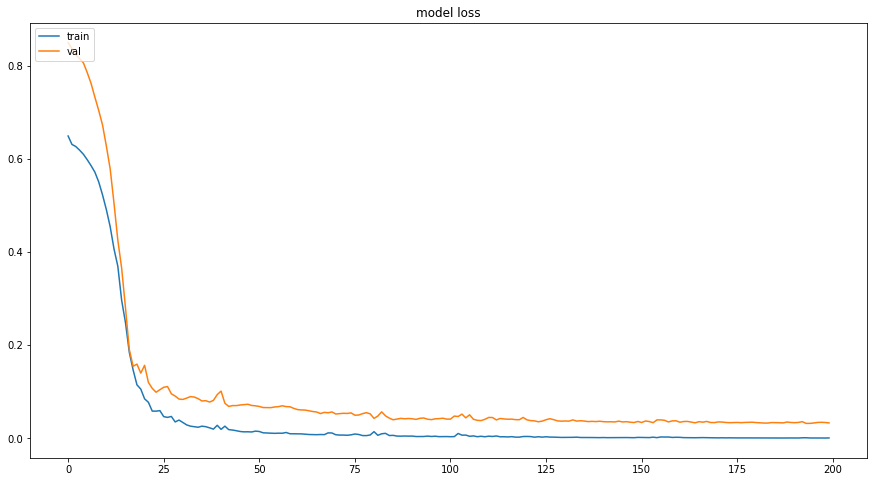

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

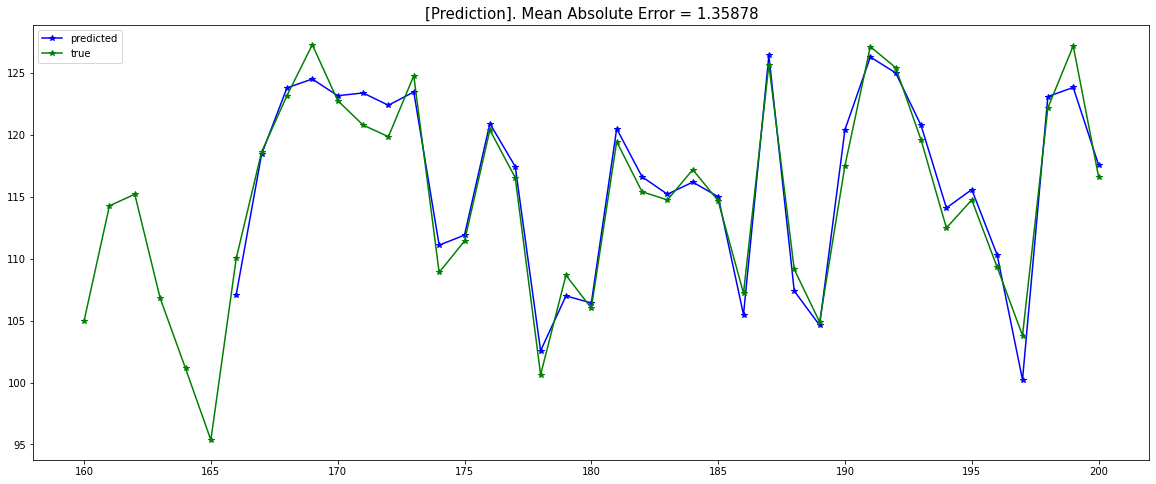

In [12]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)

y_pred_convert = y_pred * np.std(output_train) + np.mean(output_train)
y_test_convert = y_test * np.std(output_train) + np.mean(output_train)

MAE = mean_absolute_error(y_test_convert, y_pred_convert)

plt.figure(figsize=(20, 8))
plt.plot(range(INDEX_SPLIT+LEN_COLUMN, len(RANGE_T)), y_pred_convert,'b-*', label='predicted')
plt.plot(range(INDEX_SPLIT, len(RANGE_T)), output_test, 'g-*', label='true')
plt.title('[Prediction]. Mean Absolute Error = %.5f'%(MAE), fontsize=15)
plt.legend()


